# HEART DISEASE PREDICTION SYSTEM USING MACHINE LEARNING

# BY:
    IN13/00012/20 SAMMY PETER
    IN13/00091/20 ALVIN NDUU


# OVERVIEW OF THE DATASET

Import all the required libraries

In [1]:
### libraries to be used in our system

import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns 
from sklearn.metrics import accuracy_score,mean_squared_error  
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score


Matplotlib is building the font cache; this may take a moment.


Load our dataset

In [2]:
### Loading dataset

heart=pd.read_csv('heart.csv')

looking at first five rows of our dataset to have an overview

In [3]:
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

Having an overview of dataset by selecting ten rows at random

In [4]:
heart.sample(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
262   53    1   0       123   282    0        1       95      1      2.0   
285   46    1   0       140   311    0        1      120      1      1.8   
248   54    1   1       192   283    0        0      195      0      0.0   
135   49    0   0       130   269    0        1      163      0      0.0   
101   59    1   3       178   270    0        0      145      0      4.2   
105   68    0   2       120   211    0        0      115      0      1.5   
208   49    1   2       120   188    0        1      139      0      2.0   
278   58    0   1       136   319    1        0      152      0      0.0   
156   47    1   2       130   253    0        1      179      0      0.0   
188   50    1   2       140   233    0        1      163      0      0.6   

     slope  ca  thal  target  
262      1   2     3       0  
285      1   2     3       0  
248      2   1     3       0  
135      2   0     2       1  
101      0   0     3       1  
105      1   0     2       1  
208      1   3     3       0  
278      2   2     2       0  
156      2   0     2       1  
188      1   1     3       0

Getting shape of dataset to know the number of rows and columns

In [5]:
### shape of dataset

heart.shape

(303, 14)

From above shape we know that our dataset is made up of 14 columns and 303 rows

lets look at the rows

In [6]:
### columns of dataset

heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

getting details of each column

In [7]:
### getting details of each column

info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(heart.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Information from our dataset

In [8]:
### Dataset information

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Describing dataset

In [9]:
### Describing dataset

heart.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

Getting details by grouping dataset using the target column

In [10]:
heart.groupby('target').sum()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
target                                                                  
0       7811  114   66     18547  34650   22       62    19196     76   
1       8662   93  227     21335  39968   23       98    26147     23   

        oldpeak  slope   ca  thal  
target                             
0         218.8    161  161   351  
1          96.2    263   60   350

# VISUALIZATION

Plot histogram for each column to have a clear overview of the dataset

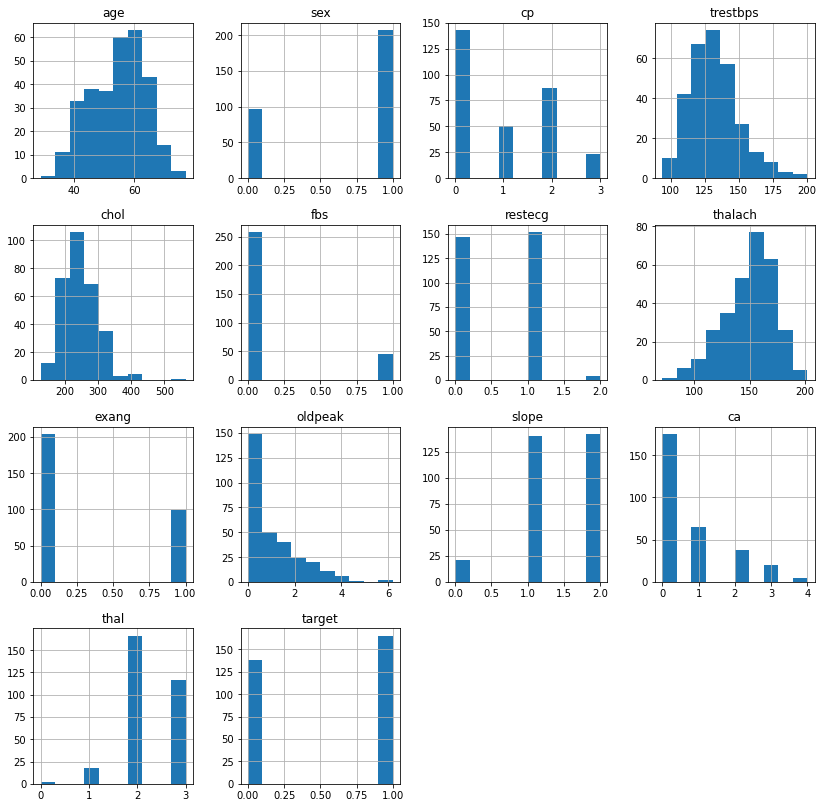

In [11]:
### Plotting histograms for each column

heart.hist(figsize=(14,14))
plt.show()

Distribution of Heart disease (target variable)

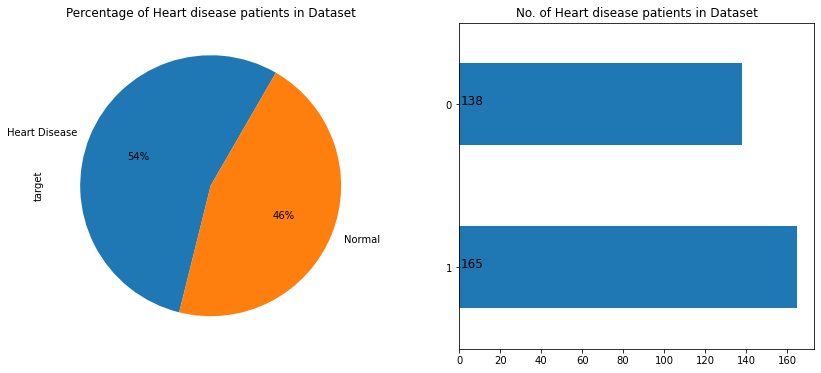

In [12]:
# Plotting attrition of patients
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = heart['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = heart["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(heart["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

The dataset is balanced having 165 heart disease patients and 138 normal patients

/home/sammy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sammy/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


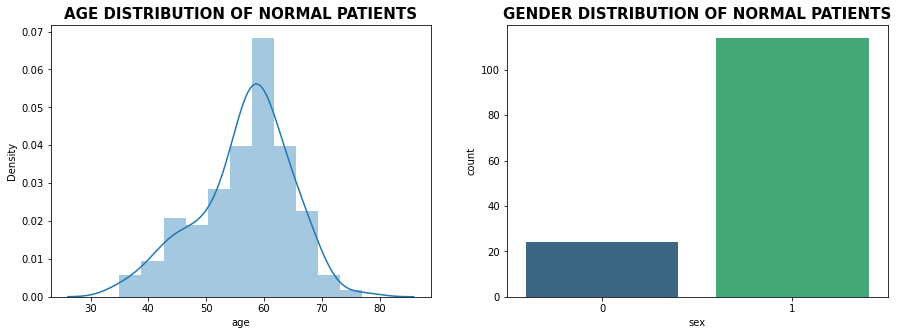

/home/sammy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sammy/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


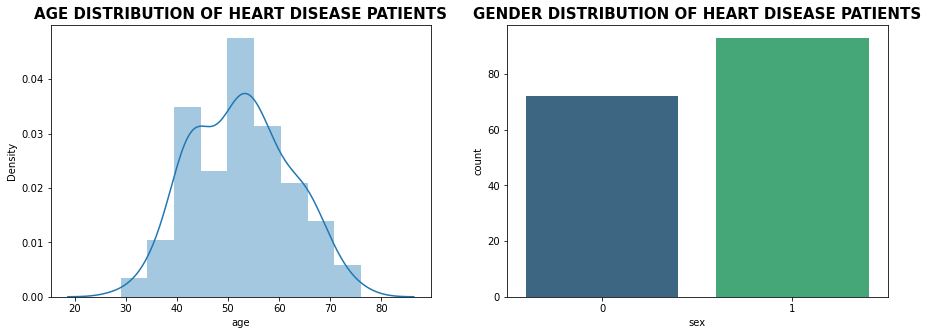

In [13]:
# creating separate df for normal and heart patients

attr_1=heart[heart['target']==1]

attr_0=heart[heart['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

As we can see from above plot more male patients accounts for heart disease in comparison to females whereas mean age for heart disease patients is around 50 to 55 years

/home/sammy/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/sammy/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


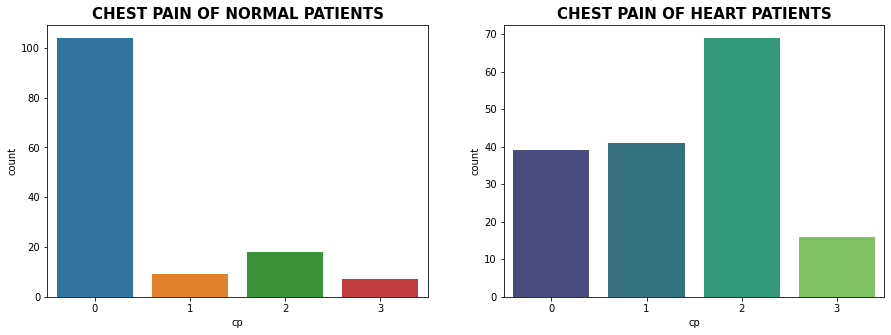

In [14]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['cp'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['cp'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

more heart disease patients suffer from asymptomatic chest pain

/home/sammy/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/sammy/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


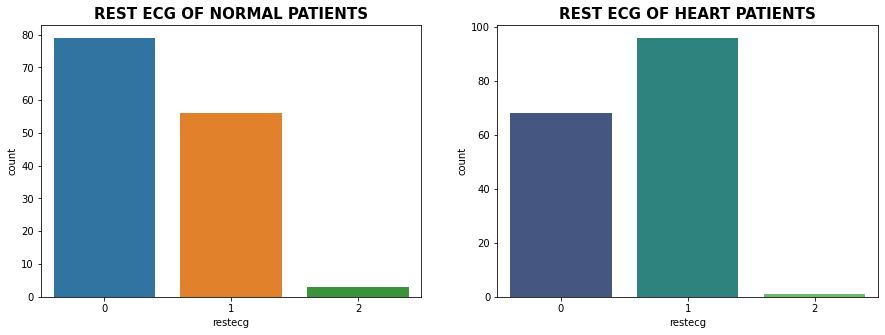

In [15]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['restecg'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['restecg'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

/home/sammy/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/sammy/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


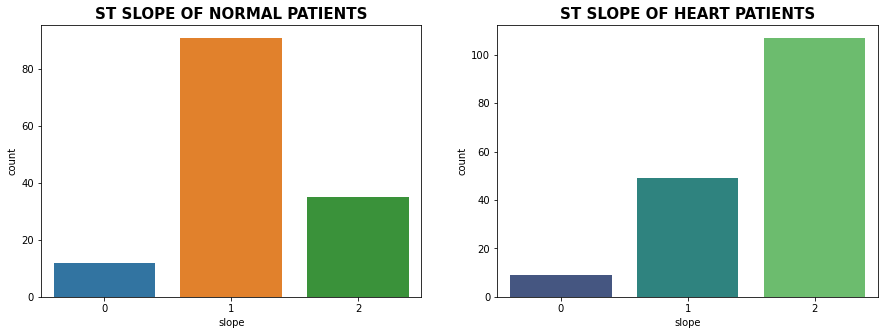

In [16]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [17]:
px.bar(heart,heart['sex'],heart['target'])

/home/sammy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='thal', ylabel='Density'>

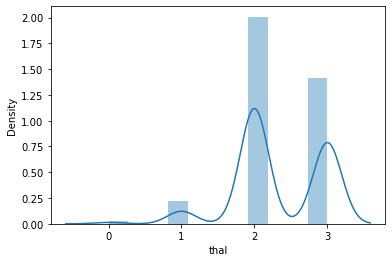

In [18]:
sns.distplot(heart["thal"])

Relationship between different columns

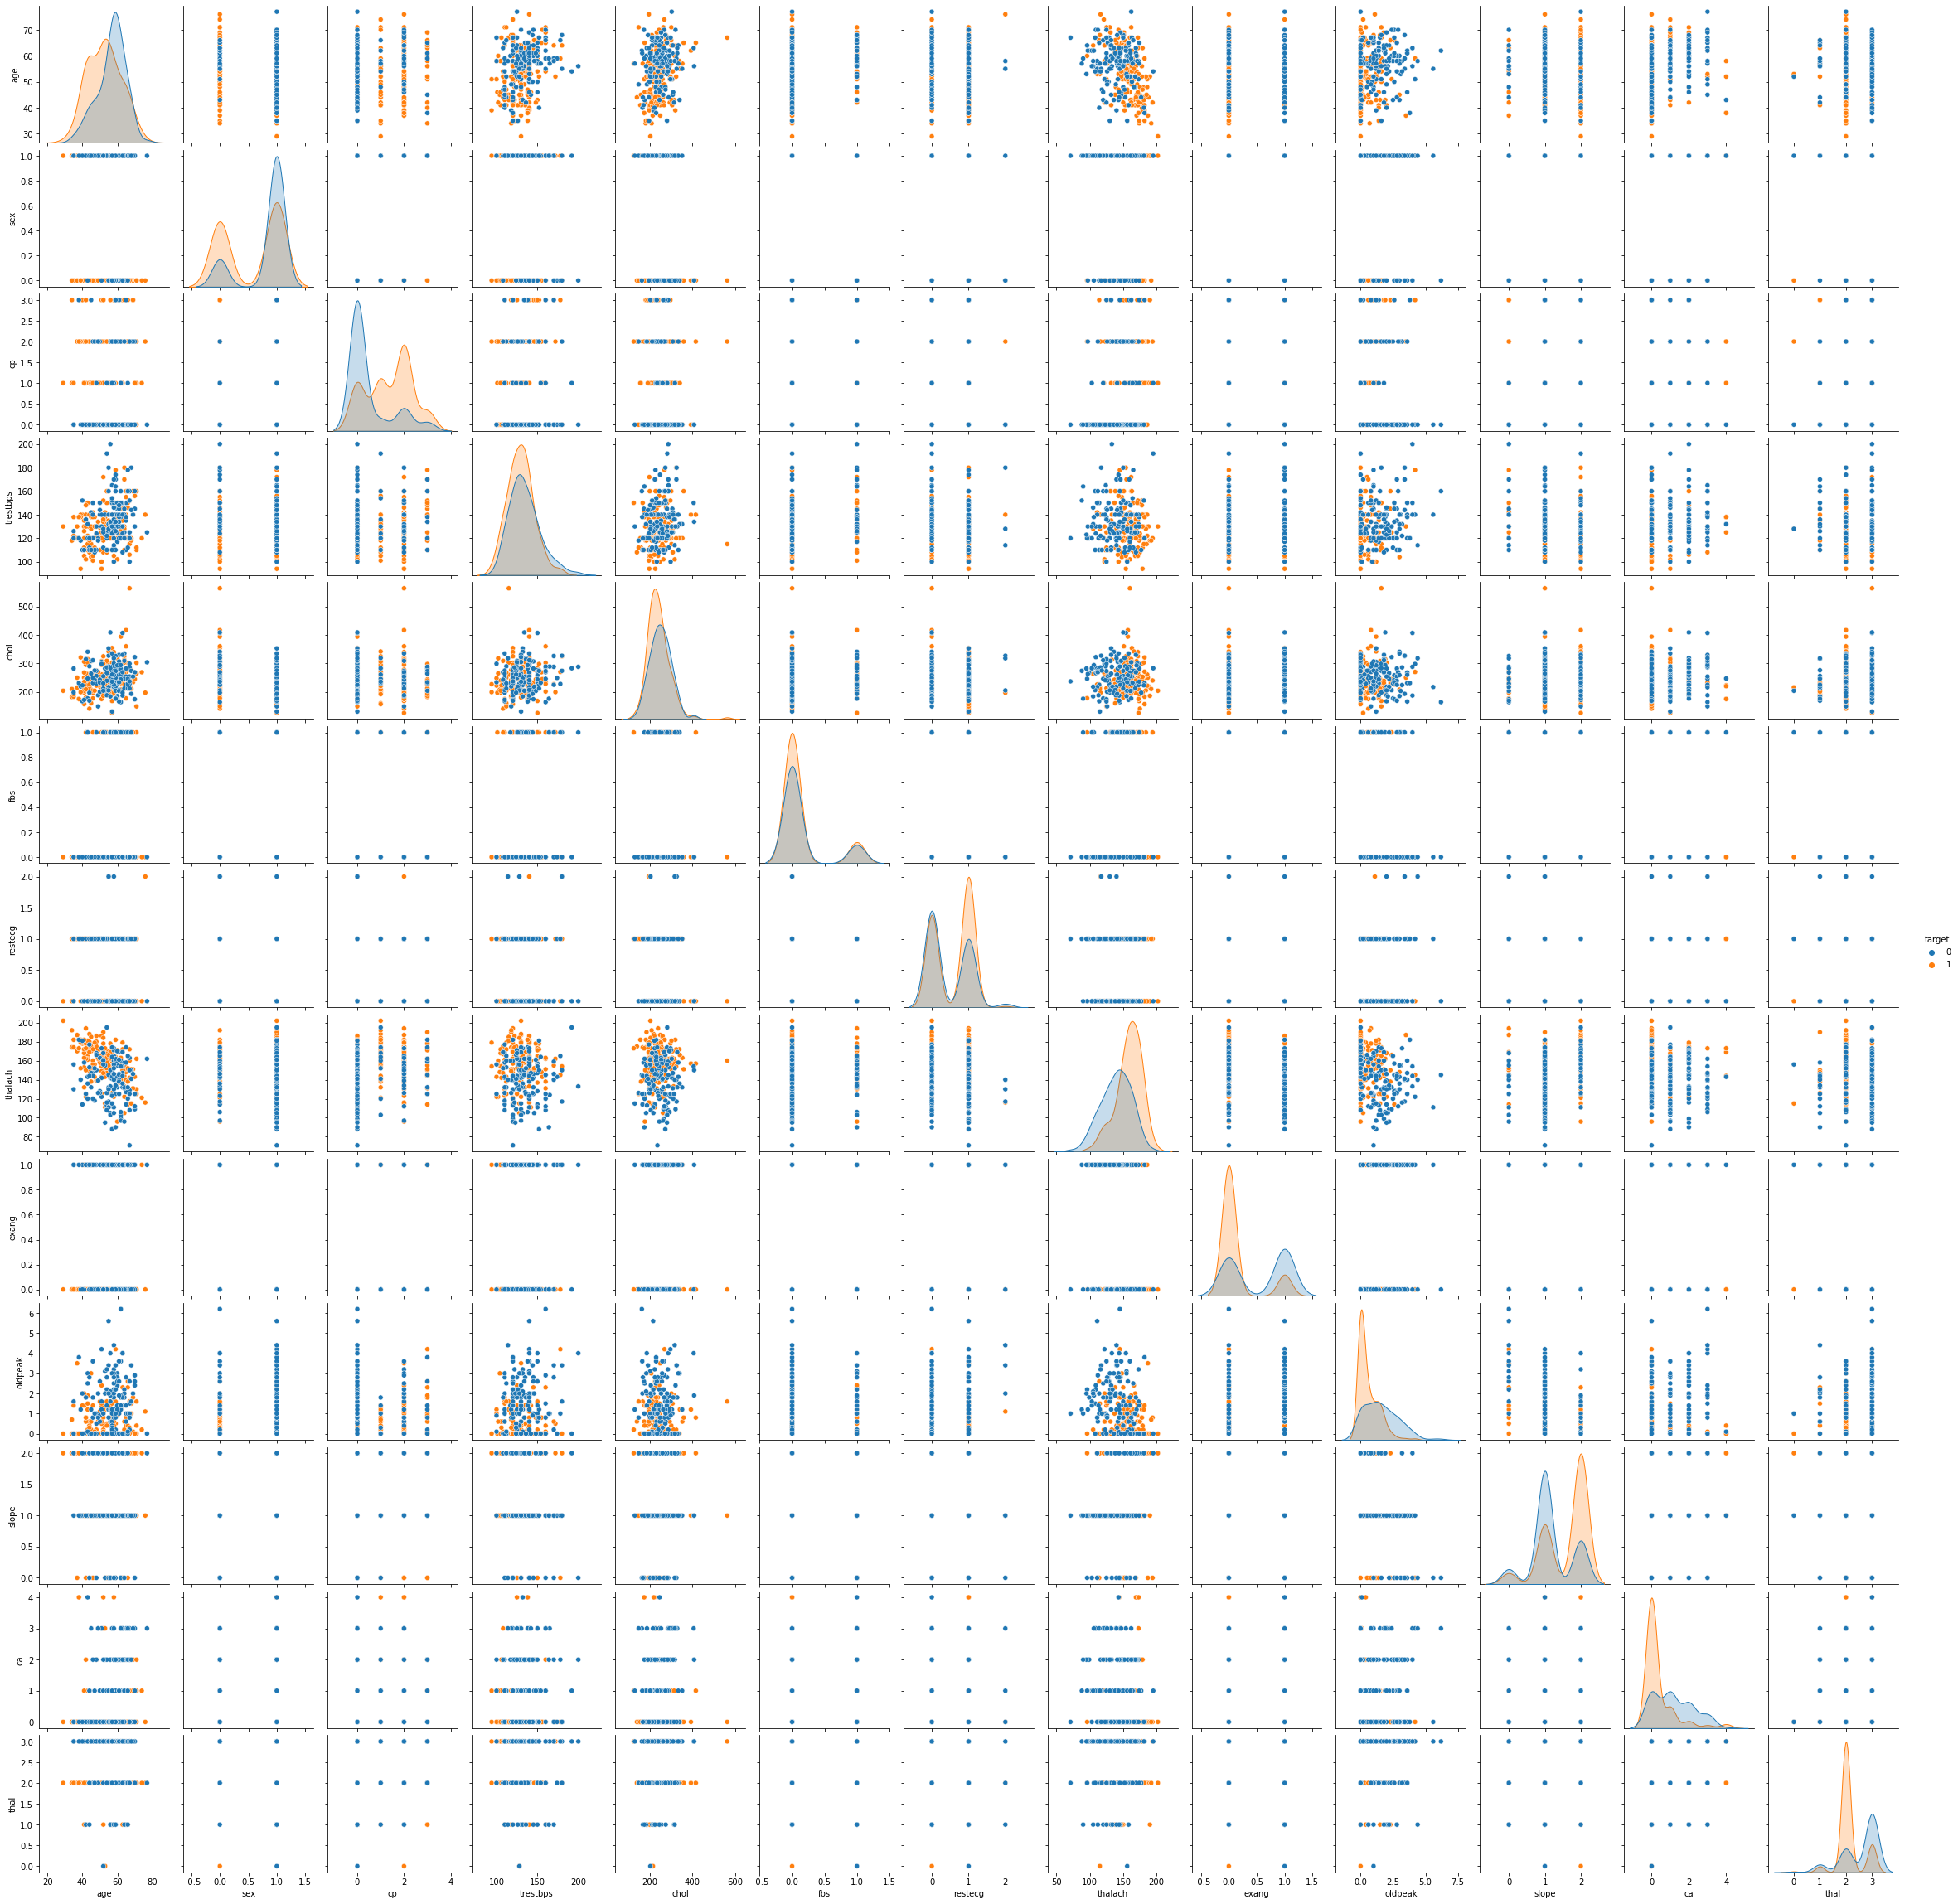

In [19]:
sns.pairplot(heart,hue='target')

splitting dataset into numeric and categorical

In [20]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']

relationship among numeric columns 

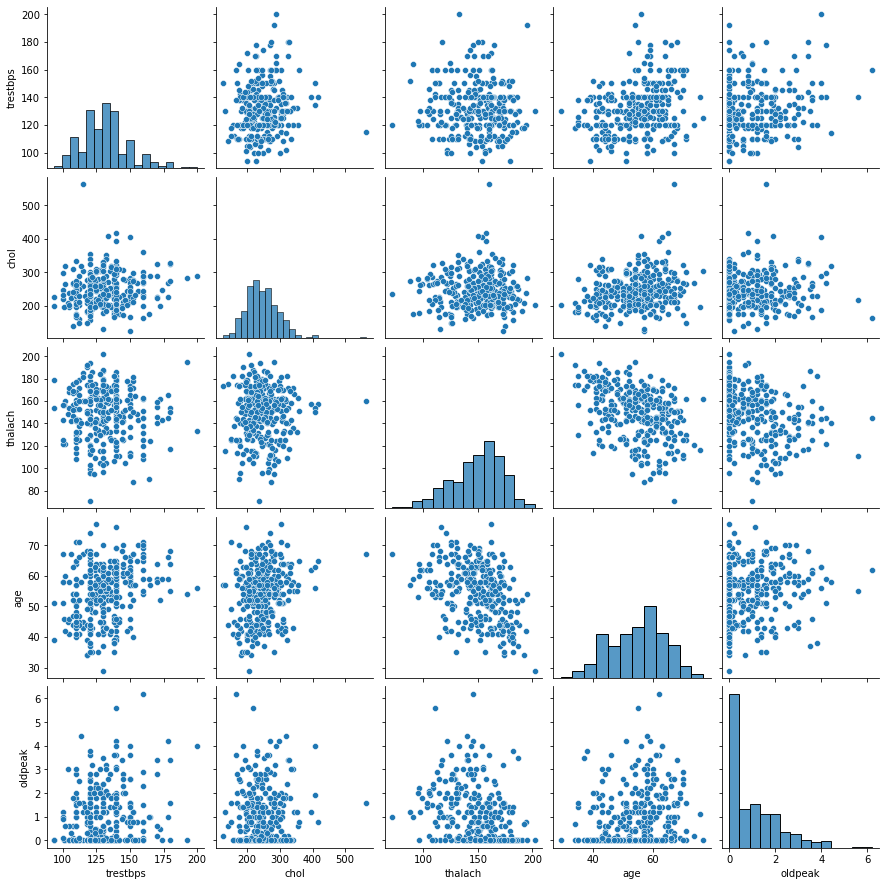

In [21]:
sns.pairplot(heart[numeric_columns])

correlation between numeric columns

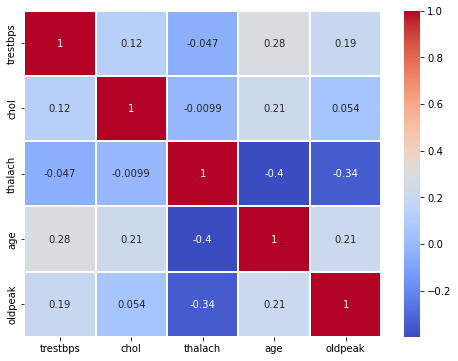

In [22]:
# create a correlation heatmap
sns.heatmap(heart[numeric_columns].corr(),annot=True, cmap='coolwarm', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

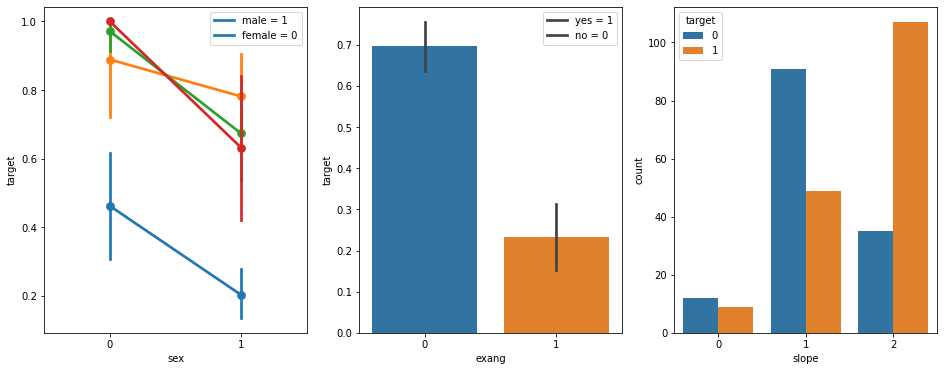

In [23]:
# create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="target", hue='cp', data=heart)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="exang", y="target", data=heart)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='target', data=heart)
plt.show()

# DATA PREPROCESSING

In [24]:
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [25]:
heart['target'].isnull().sum()

0

There are no null values in our dataset

In [26]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Storing in X and y

In [27]:
X,y=heart,heart.target

In [28]:
X.drop('target',axis=1,inplace=True)

shape of X and y

In [29]:
print("X shape:")
print(X.shape)
print("\ny shape:")
print(y.shape)

X shape:
(303, 13)

y shape:
(303,)


Splitting dataset into training and testing 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Finding f1 score and accurancy before feature selection

In [31]:
### Using random forest, knn and svm models

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

svm = SVC()
svm.fit(X_train, y_train)

SVC()

above we performed fitting of our models

In [32]:
### accurancy of the three models

rf_acc_score = accuracy_score(y_test, rf.predict(X_test))
knn_acc_score = accuracy_score(y_test, knn.predict(X_test))
svm_acc_score = accuracy_score(y_test, svm.predict(X_test))

### f1 score of the three models

rf_f1_score = f1_score(y_test, rf.predict(X_test))
knn_f1_score = f1_score(y_test, knn.predict(X_test))
svm_f1_score = f1_score(y_test, svm.predict(X_test))


plotting f1 score and accurancy before performing feature selection

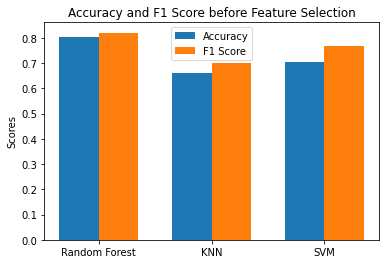

In [33]:
labels = ['Random Forest', 'KNN', 'SVM']
acc_scores = [rf_acc_score, knn_acc_score, svm_acc_score]
f1_scores = [rf_f1_score, knn_f1_score, svm_f1_score]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, acc_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('Accuracy and F1 Score before Feature Selection')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

from above figure all the three models had higher f1 score compared to their corresponding accurancy with random forest having the highest f1 score and accurancy among the three

performing feature selection

In [34]:
skb = SelectKBest(chi2, k=5)
X_new = skb.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

Fitting the three models after feature selection

In [35]:
### Fitting the three models after feature selection

rf_after = RandomForestClassifier()
rf_after.fit(X_train, y_train)

knn_after = KNeighborsClassifier()
knn_after.fit(X_train, y_train)

svm_after = SVC()
svm_after.fit(X_train, y_train)

SVC()

Finding accurancy and F1 score after feature selection

In [36]:
### Accurancy score

rf_acc_score_after = accuracy_score(y_test, rf_after.predict(X_test))
knn_acc_score_after = accuracy_score(y_test, knn_after.predict(X_test))
svm_acc_score_after = accuracy_score(y_test, svm_after.predict(X_test))

### f1 score score

rf_f1_score_after = f1_score(y_test, rf_after.predict(X_test))
knn_f1_score_after = f1_score(y_test, knn_after.predict(X_test))
svm_f1_score_after = f1_score(y_test, svm_after.predict(X_test))

Plotting bar graph to show F1 Score and Accurancy after feature selection

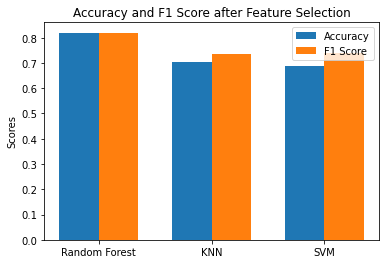

In [37]:
labels = ['Random Forest', 'KNN', 'SVM']
acc_scores = [rf_acc_score_after, knn_acc_score_after, svm_acc_score_after]
f1_scores = [rf_f1_score_after, knn_f1_score_after, svm_f1_score_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, acc_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('Accuracy and F1 Score after Feature Selection')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

Random forest had the highest accurancy and f1 score among the three models after performing feature selection

# TESTING OUR MODEL

In [38]:
prediction=rf_after.predict(X_test)

In [39]:
prediction

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

Feeding data to our prediction model

In [40]:
X_rf = np.array([[59,1,3,170,288]])
X_rf_prediction = rf_after.predict(X_rf)

In [41]:
X_rf_prediction[0]

0

OOPS!!! THE MODEL PREDICTED OUTPUT